In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

# 风格参数设置
就下面5种主题风格：

darkgrid/whitegrid（深色带格子／白色带格子）：更关注数值，所以带格子嘛～   
dark/white：更关注整体趋势   
ticks：强化刻度   

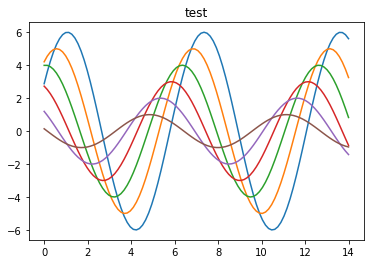

In [3]:
def sinplot(flip=1, title='test'):
    x = np.linspace(0, 14, 100)
    plt.title(title)
    for i in range(1, 7): # up to but not include
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
sinplot()

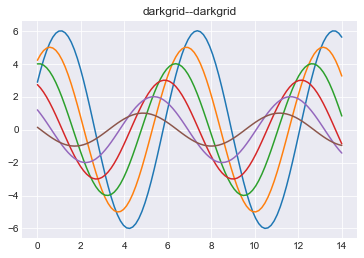

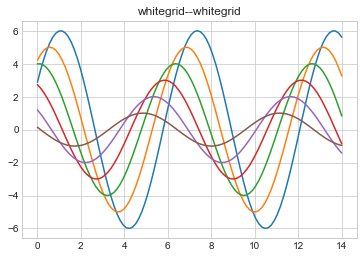

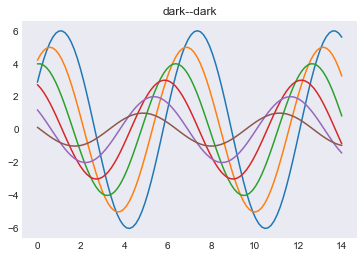

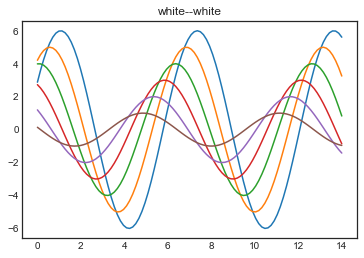

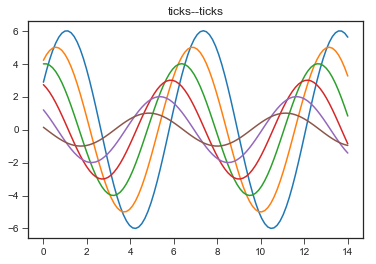

In [4]:
for style in ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']:
    sns.set_style(style)
    sinplot(1,style+'--'+style)
    plt.show()

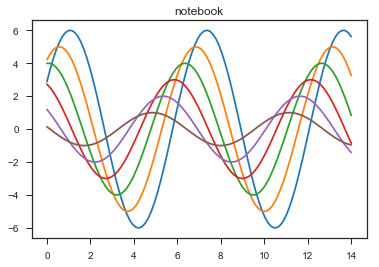

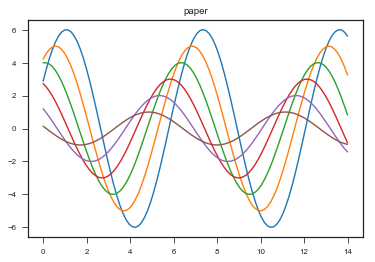

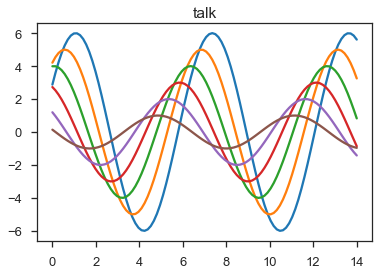

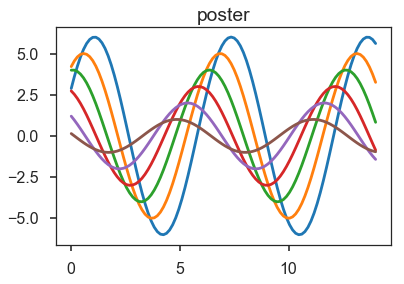

In [8]:
for c in ["notebook", "paper", "talk", "poster",]:
    sns.set_context(c) # 比如用于期刊论文
    sinplot(title=c)
    plt.show()

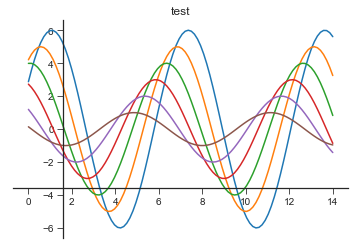

In [5]:
sinplot()
sns.despine(offset=-50)# offset参数可以调节分离坐标轴

# 加载样例数据

In [9]:
tips = sns.load_dataset("tips") # 餐厅小费案例（seaborn内置）
tips['total_bill_norm'] = tips['total_bill']+np.random.normal(size=tips.shape[0])*5
tips.head()

,total_bill,tip,sex,smoker,day,time,size,total_bill_norm
0,16.99,1.01,Female,No,Sun,Dinner,2,10.781935
1,10.34,1.66,Male,No,Sun,Dinner,3,13.764493
2,21.01,3.50,Male,No,Sun,Dinner,3,17.809035
3,23.68,3.31,Male,No,Sun,Dinner,2,14.232738
4,24.59,3.61,Female,No,Sun,Dinner,4,20.096231


In [10]:
iris = sns.load_dataset("iris") # 鸢尾花数据库
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# str

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

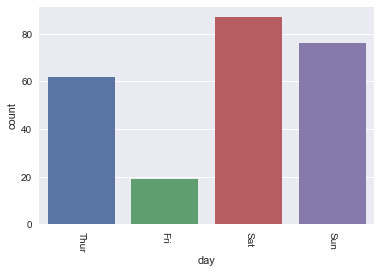

In [70]:
sns.countplot(x="day", data=tips,)
plt.xticks(rotation=-90)
# 可以用颜色区分x轴的定序数据，

# num

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


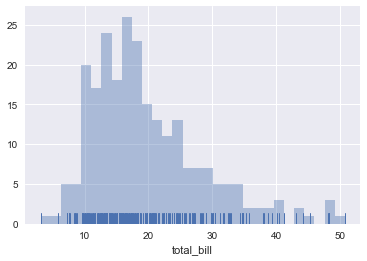

In [69]:
# 灰度图
sns.distplot(tips['total_bill'], kde=False, bins=30, rug=True)
# rug 控制是否显示观测的小细条（边际毛毯）

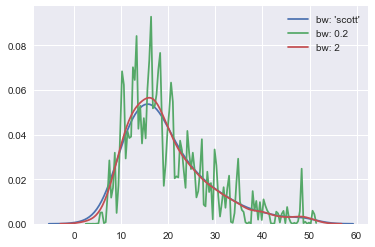

In [58]:
# KDE图
sns.kdeplot(tips['total_bill'], label = "bw: 'scott'")
sns.kdeplot(tips['total_bill'], bw=.2, label="bw: 0.2")
sns.kdeplot(tips['total_bill'], bw=2, label="bw: 2") # 过于平滑
plt.legend()

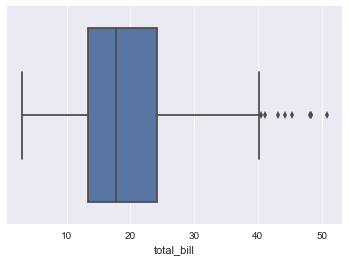

In [59]:
sns.boxplot(tips['total_bill'])

# num_and_num

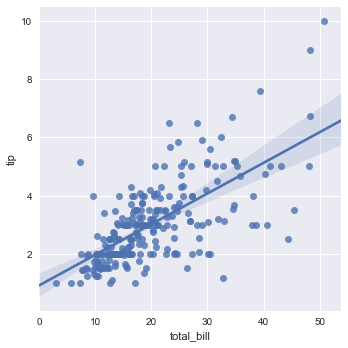

In [19]:
sns.lmplot(x="total_bill", y="tip", data=tips)

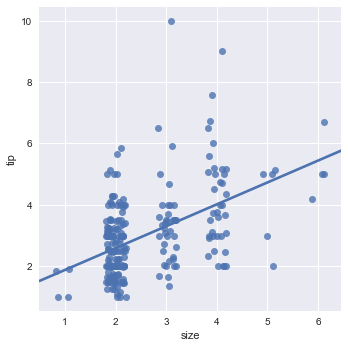

In [23]:
sns.lmplot(x="size", y="tip", data=tips, 
           ci=None, x_jitter=0.2) # x_jitter抖动的幅度
# 在基准位置左右0.2范围内随机抖动。。。。
# 置信区间 ci（有时为了画的快些而关掉）

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


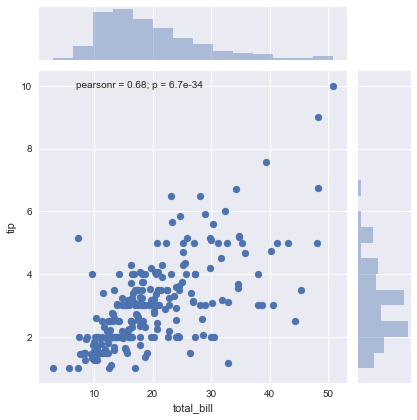

In [32]:
# x与y散点图／x和y灰度图／personr相关性系数／p value抽样误差（p越小越好）
sns.jointplot(x="total_bill", y="tip", data=tips)

(可以看到total_bill和tip之间存在线性相关关系)

(置信区间很小不仅是因为数据量的体现，也会确实是置信的体现)

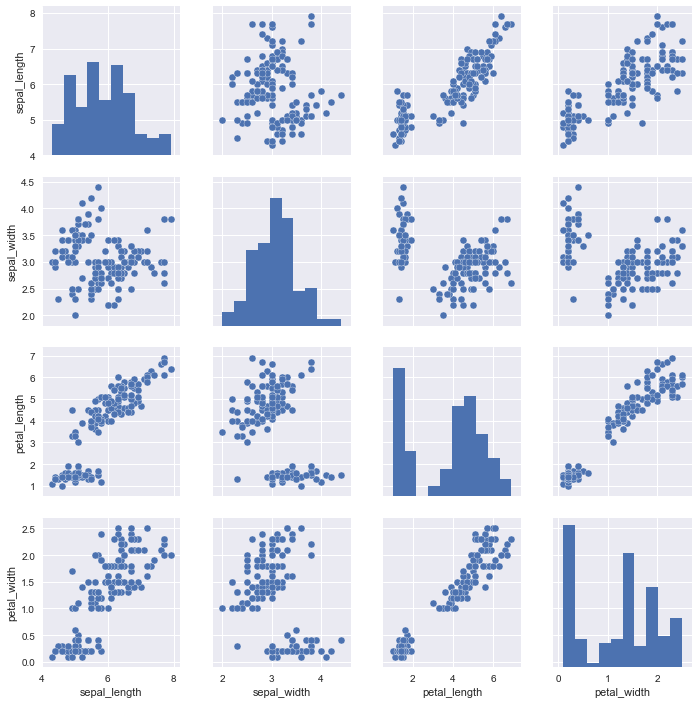

In [34]:
sns.pairplot(iris)

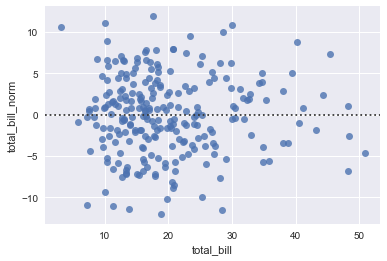

In [67]:
# 残差图
sns.residplot(tips['total_bill'], tips['total_bill_norm'], )

# str_and_num

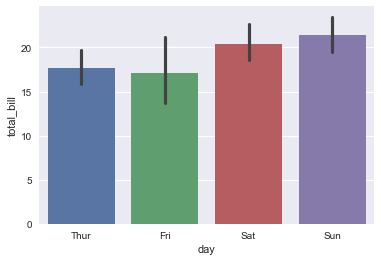

In [45]:
sns.barplot(x="day", y="total_bill", data=tips)

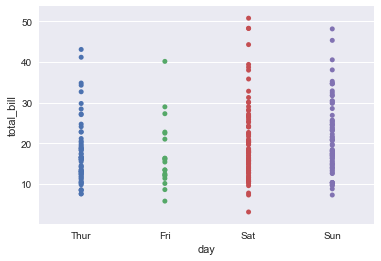

In [35]:
sns.stripplot(x="day", y="total_bill", data=tips)

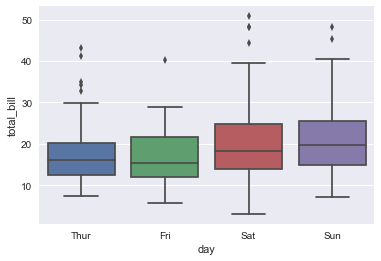

In [38]:
sns.boxplot(x="day", y="total_bill", data=tips)

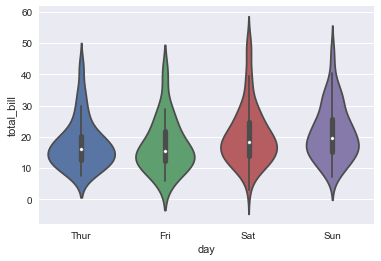

In [39]:
sns.violinplot(x="day", y="total_bill", data=tips)

# 更多变量关系图

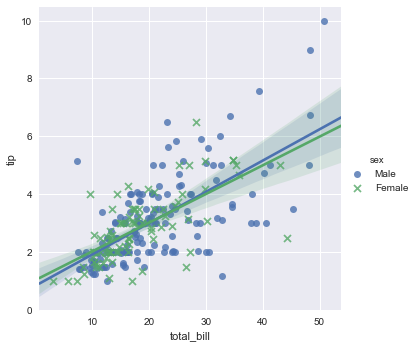

In [25]:
sns.lmplot(x="total_bill", y="tip", hue="sex", 
           markers=["o", "x"], data=tips)

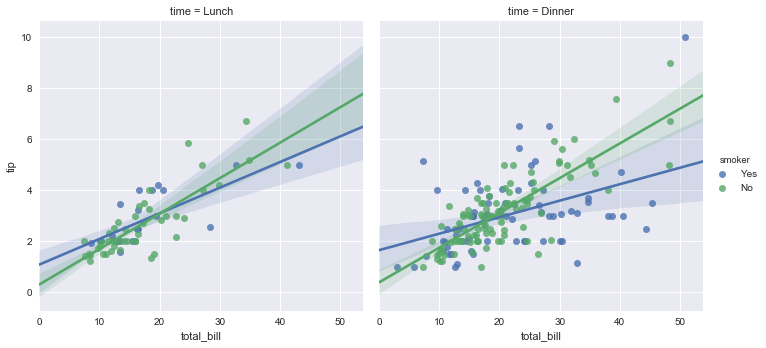

In [26]:
# col表示不同列
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips) 
# col: column

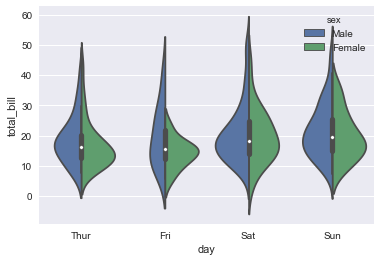

In [46]:
# split：一边一类
# inner：box箱式图，quartiles分位数，point或者 stick 直接标明样本
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True, inner="box")

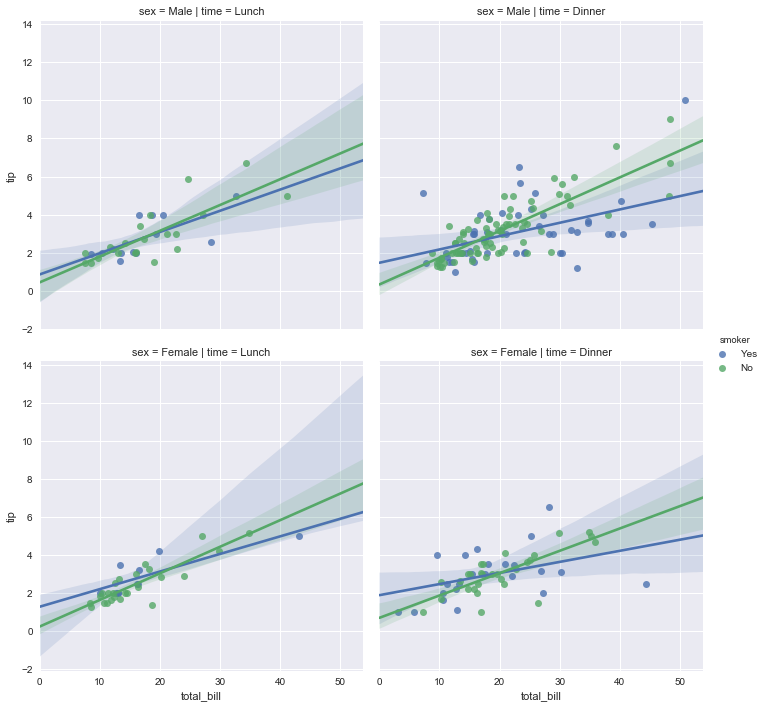

In [27]:
sns.lmplot(x="total_bill", y="tip", 
           hue="smoker", col="time", row="sex", 
           data=tips)

# 多图合一图

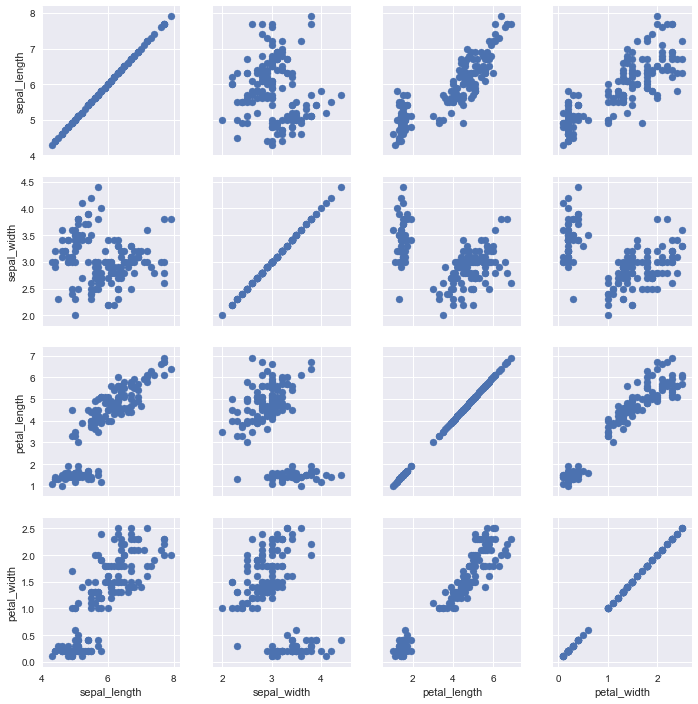

In [53]:
g = sns.PairGrid(iris)
g.map(plt.scatter,)

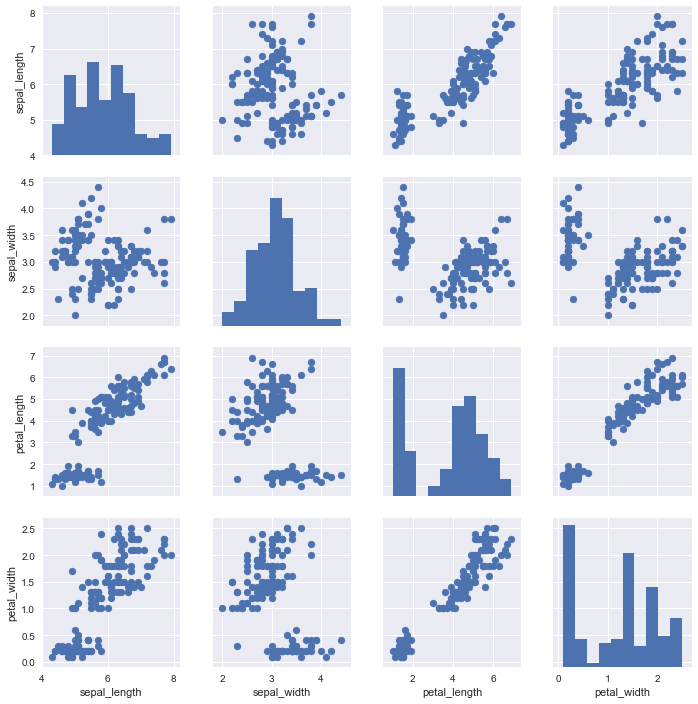

In [54]:
g = sns.PairGrid(iris)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

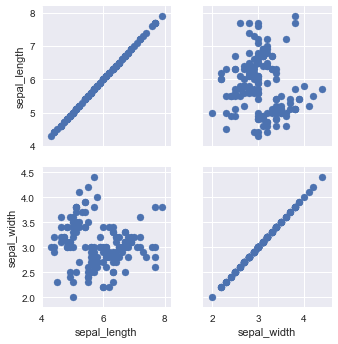

In [55]:
g = sns.PairGrid(iris, vars=["sepal_length", "sepal_width"])
g = g.map(plt.scatter)

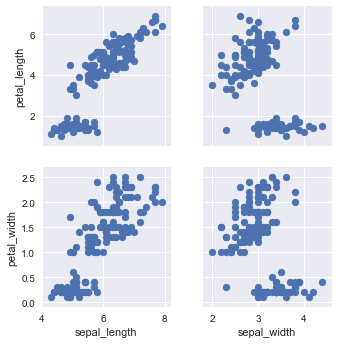

In [56]:
g = sns.PairGrid(iris,
            x_vars=["sepal_length", "sepal_width"],
            y_vars=["petal_length", "petal_width"])

g = g.map(plt.scatter)


# 其它图

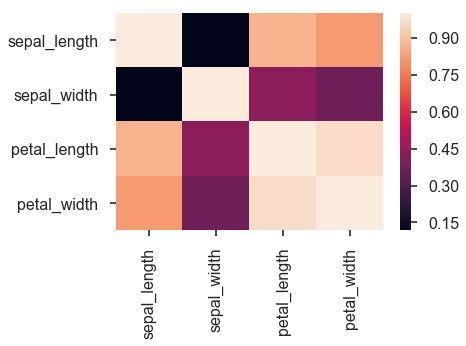

In [19]:
iris_corr = iris.iloc[:,:4].corr().abs()
sns.heatmap(iris_corr)